In [1]:
# Working with Dataframes
# -----------------------------------------------------------------------
import pandas as pd

# Path configuration for custom module imports
# -----------------------------------------------------------------------
import sys
sys.path.append('../')  # Adds the parent directory to the path for custom module imports

# Import custom functions to work with databases
# -----------------------------------------------------------------------
from src.support_db import sql_query
from src.support_queries import query

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In the file `sql/03-view_creation.sql`, we have a query that creates a view with the information relevant to our analysis.

We will retrieve the columns of interest from the view, leaving aside others such as dates, which might be relevant for future analyses.

In [3]:
data, columns = sql_query(query)

if data and columns:
    df = pd.DataFrame(data, columns=columns)
else:
    print("No data returned from the query.")

Query performed successfully.
Database connection closed.


In [4]:
df.shape

(6410, 15)

We have a total of 6410 entries

We check for duplicates.

In [5]:
df.duplicated().sum()

0

### Columns

In [6]:
df.head()

,user_id,user_type,country,recommendation_system,content_id,content_duration,content_type,content_rating,view_id,view_date,duration_viewed,recommendation_id,recommended_by,interaction_id,interaction_type
0,214,moderator,Germany,Recomendeitor_Plus,153,92,movie,2.5,1,2021-12-31,107,NaN,None,64.0,like
1,214,moderator,Germany,Recomendeitor_Plus,153,92,movie,2.5,1,2021-12-31,107,NaN,None,559.0,like
2,214,moderator,Germany,Recomendeitor_Plus,153,92,movie,2.5,1,2021-12-31,107,NaN,None,446.0,favorite
3,214,moderator,Germany,Recomendeitor_Plus,153,92,movie,2.5,1,2021-12-31,107,NaN,None,1112.0,favorite
4,214,moderator,Germany,Recomendeitor_Plus,153,92,movie,2.5,1,2021-12-31,107,NaN,None,1271.0,share


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6410 entries, 0 to 6409
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                6410 non-null   int64  
 1   user_type              6410 non-null   object 
 2   country                6410 non-null   object 
 3   recommendation_system  6410 non-null   object 
 4   content_id             6410 non-null   int64  
 5   content_duration       6410 non-null   int64  
 6   content_type           6410 non-null   object 
 7   content_rating         6410 non-null   object 
 8   view_id                6410 non-null   int64  
 9   view_date              6410 non-null   object 
 10  duration_viewed        6410 non-null   int64  
 11  recommendation_id      99 non-null     float64
 12  recommended_by         99 non-null     object 
 13  interaction_id         6013 non-null   float64
 14  interaction_type       6013 non-null   object 
dtypes: f

* `user_id` provides a unique identifier for the user.

In [8]:
number_of_users = len(df['user_id'].unique())
user_id_min = df['user_id'].min()
user_id_max = df['user_id'].max()

print(f"We have a total of {number_of_users}. The minimun id is {user_id_min} and maximum {user_id_max}")

We have a total of 949. The minimun id is 1 and maximum 1000


We see that we have 949 users whose `user_id` ranges from 1 to 1000, so there must be some missing identifiers. It is possible that they correspond to users who have unsubscribed.

* `user_type` indicates the type of user.

In [9]:
df['user_type'].value_counts()

user_type
content_creator    1652
consumer           1614
admin              1584
moderator          1560
Name: count, dtype: int64

We have different types of users: `content_creator`, `consumer`, `admin`, and `moderator`. We see that they are distributed quite evenly, which is unusual for a streaming platform since most users are usually `consumer`.

In this case, the dataset is fictional, but in reality, it could indicate a bias in the sample, and further investigation would be needed to understand why this might be the case.

* `country` indicates the user's country.

In [10]:
df['country'].value_counts()

country
USA        755
Spain      745
France     723
UK         712
Germany    640
Japan      636
India      592
Italy      586
Brazil     570
Canada     451
Name: count, dtype: int64

We see that we have users from a total of 10 countries, with a fairly uniform distribution, with greater representation from European countries and the United States.

* `recommendation_system` is the recommendation system activated for the users. This allows us to distinguish the control group from the test group for conducting the A/B test.

In [11]:
df['recommendation_system'].value_counts()

recommendation_system
Recomendeitor         3293
Recomendeitor_Plus    3117
Name: count, dtype: int64

We see that the test group is slightly smaller than the control group (note if this has any impact).

* `content_id`: provides a unique identifier for the content.

In [12]:
number_of_contents = len(df['content_id'].unique())

print(f"There are a total of {number_of_contents} different contents")

There are a total of 200 different contents


In [13]:
df['content_type'].value_counts()

content_type
short          1459
movie          1330
series         1241
live           1207
documentary    1173
Name: count, dtype: int64

We have 5 different types of content distributed relatively evenly, with a greater presence of short content compared to the others.

* `content_rating`: information about the content rating.

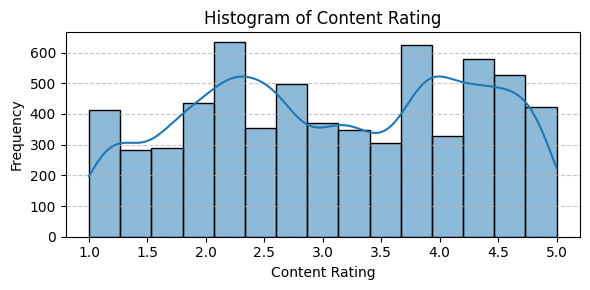

In [33]:
plt.figure(figsize=(6, 3))
sns.histplot(df['content_rating'], bins=15, kde=True)
plt.title('Histogram of Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We see that the scores are distributed quite evenly without many significant peaks.

* `view_id`: unique identifier for each view.

In [15]:
number_of_views = len(df['view_id'].unique())

print(f"There are a total of {number_of_views} different views")

There are a total of 3000 different views


* `view_date`: date when view took place

In [ ]:
df['view_date'] = pd.to_datetime(df['view_date'])

In [14]:
min_date = df['view_date'].min()
max_date = df['view_date'].max()

print(f"The minimun date is {min_date} and maximum {max_date}")

The minimun date is 2021-01-02 00:00:00 and maximum 2022-12-31 00:00:00


We see that all views took place between the 2nd of January, 2021; and the 31st of December, 2022.

In [16]:
df.groupby('user_id')['view_id'].count().sort_values(ascending=False)[:5]

user_id
239    49
499    36
111    35
919    35
195    32
Name: view_id, dtype: int64

We see that the users with the most views have a total of over 30, with one standout user having 49.

* `content_duration`: content duration, in minutes  

* `duration_viewed`: viewing duration, in minutes

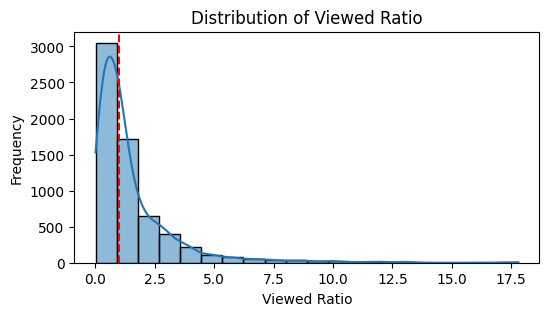

In [34]:
ratio = df['duration_viewed'] / df['content_duration']

plt.figure(figsize=(6, 3))
sns.histplot(ratio, bins=20, kde=True)
plt.title('Distribution of Viewed Ratio')
plt.xlabel('Viewed Ratio')
plt.ylabel('Frequency')
plt.axvline(x=1, color='red', linestyle='--', label='Ratio = 1')
plt.show()

We see that most views do not complete the content (ratio < 1, red line). However, there is a number of views with a viewing duration longer than the content duration. 

This could be due to a recording error (e.g., it keeps counting even if the user switches to another piece of content) or a rewatch of the same content.

* `recommendation_id`: unique identifier for the recommendation.

In [21]:
number_of_recommendations = len(df['recommendation_id'].unique())

print(f"There are a total of {number_of_recommendations} different recommendations")

There are a total of 45 different recommendations


We see that there are only 45 unique recommendations. This indicates that the recommendation system is not influencing most views, that the system is not working correctly, or that this data is not being recorded properly.  

This could significantly impact the conclusions of the analysis, so we would need to delve deeper into the meaning of this column.

* `recommended_by`: recommendation system used for the recommendation.

In [26]:
df['recommended_by'].value_counts()

recommended_by
Recomendeitor         52
Recomendeitor_Plus    47
Name: count, dtype: int64

It can be either `Recomendeitor_Plus` or `Recomendeitor`. We see that there are very few non-null values, related to the same issue as the previous column.

* `interaction_id`: unique identifier for the interaction.

In [28]:
number_of_interactions = len(df['interaction_id'].unique())

print(f"There are a total of {number_of_interactions} different interactions")

There are a total of 1907 different interactions


* `interaction_type`: type of interaction performed.

In [29]:
df['interaction_type'].value_counts()

interaction_type
favorite    1603
comment     1589
share       1422
like        1399
Name: count, dtype: int64

In this case, we have a good number of interactions distributed quite evenly. It is striking that there are more comments and shares than likes, as it is usually easier to give a like than perform any other interaction, and likes tend to have the highest numbers.  

Again, this is likely a consequence of the data being artificially generated.

---

After a quick exploratory analysis, we can move on to hypothesis testing. Let's proceed to the next notebook.